In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image

cmap='PRGn'  

# Newton fractals  

### Based on: https://en.wikipedia.org/wiki/Newton%27s_method

### Example: $f_0(z) = z^3-1$

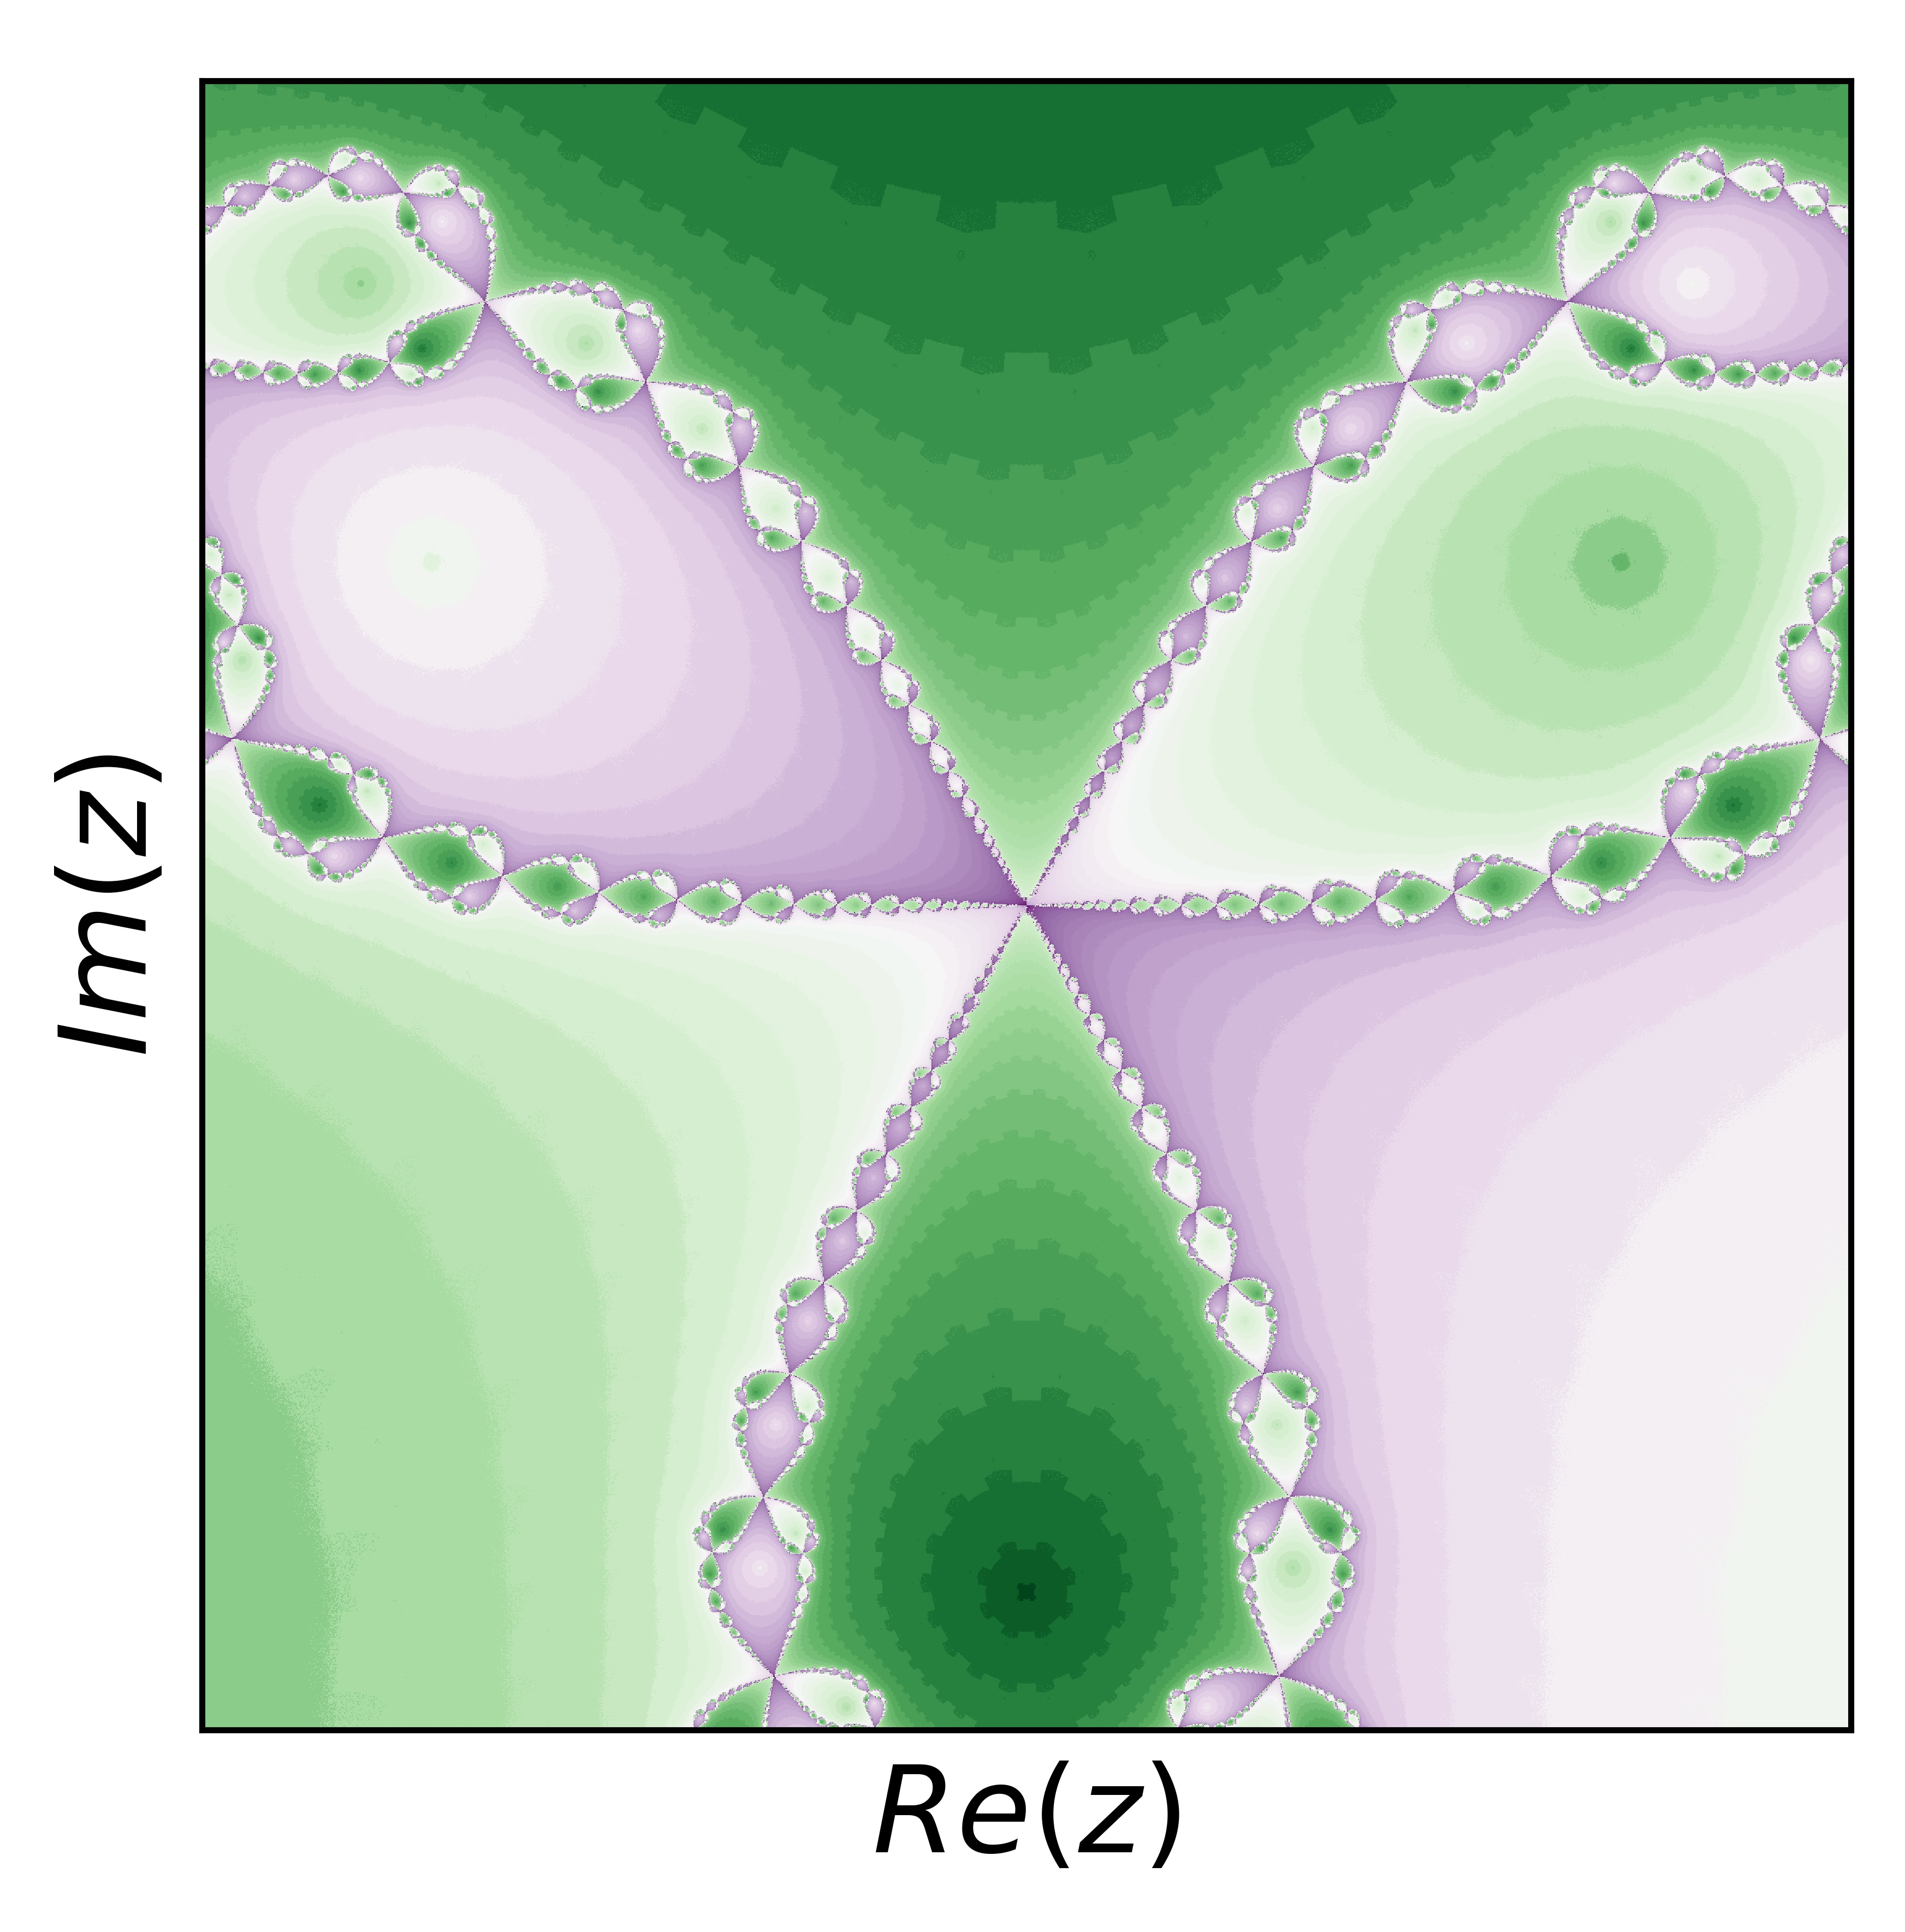

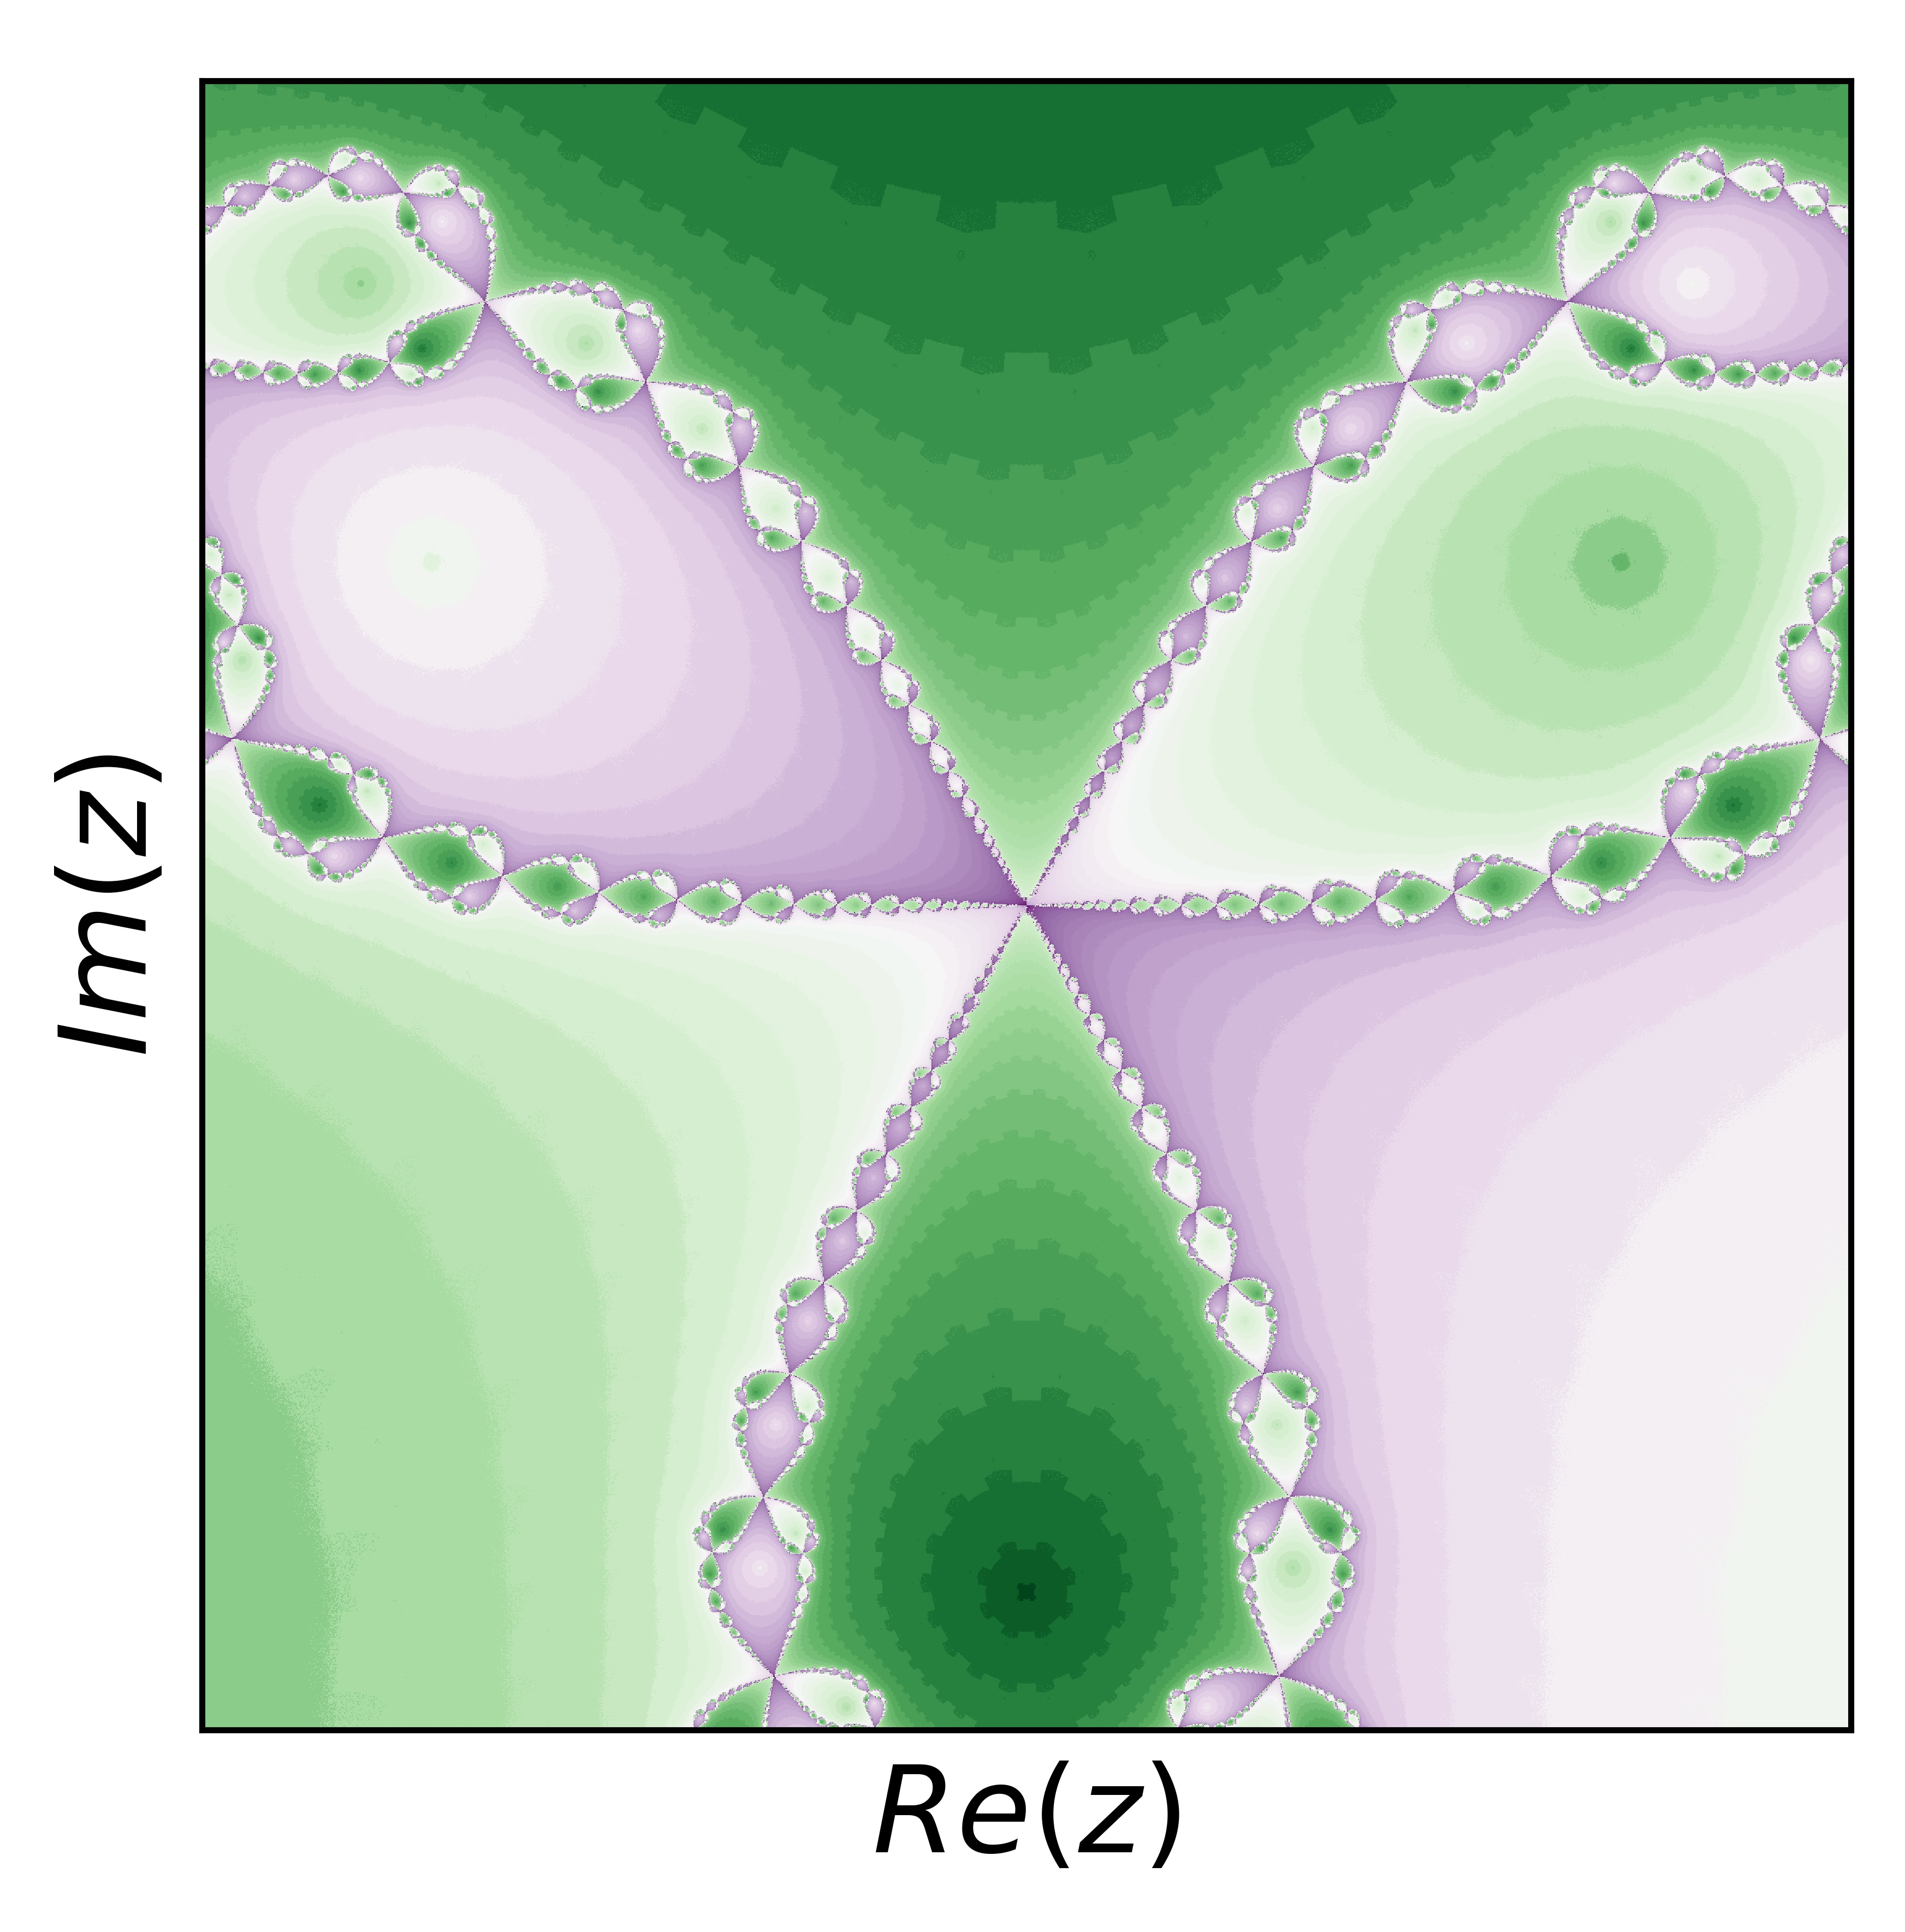

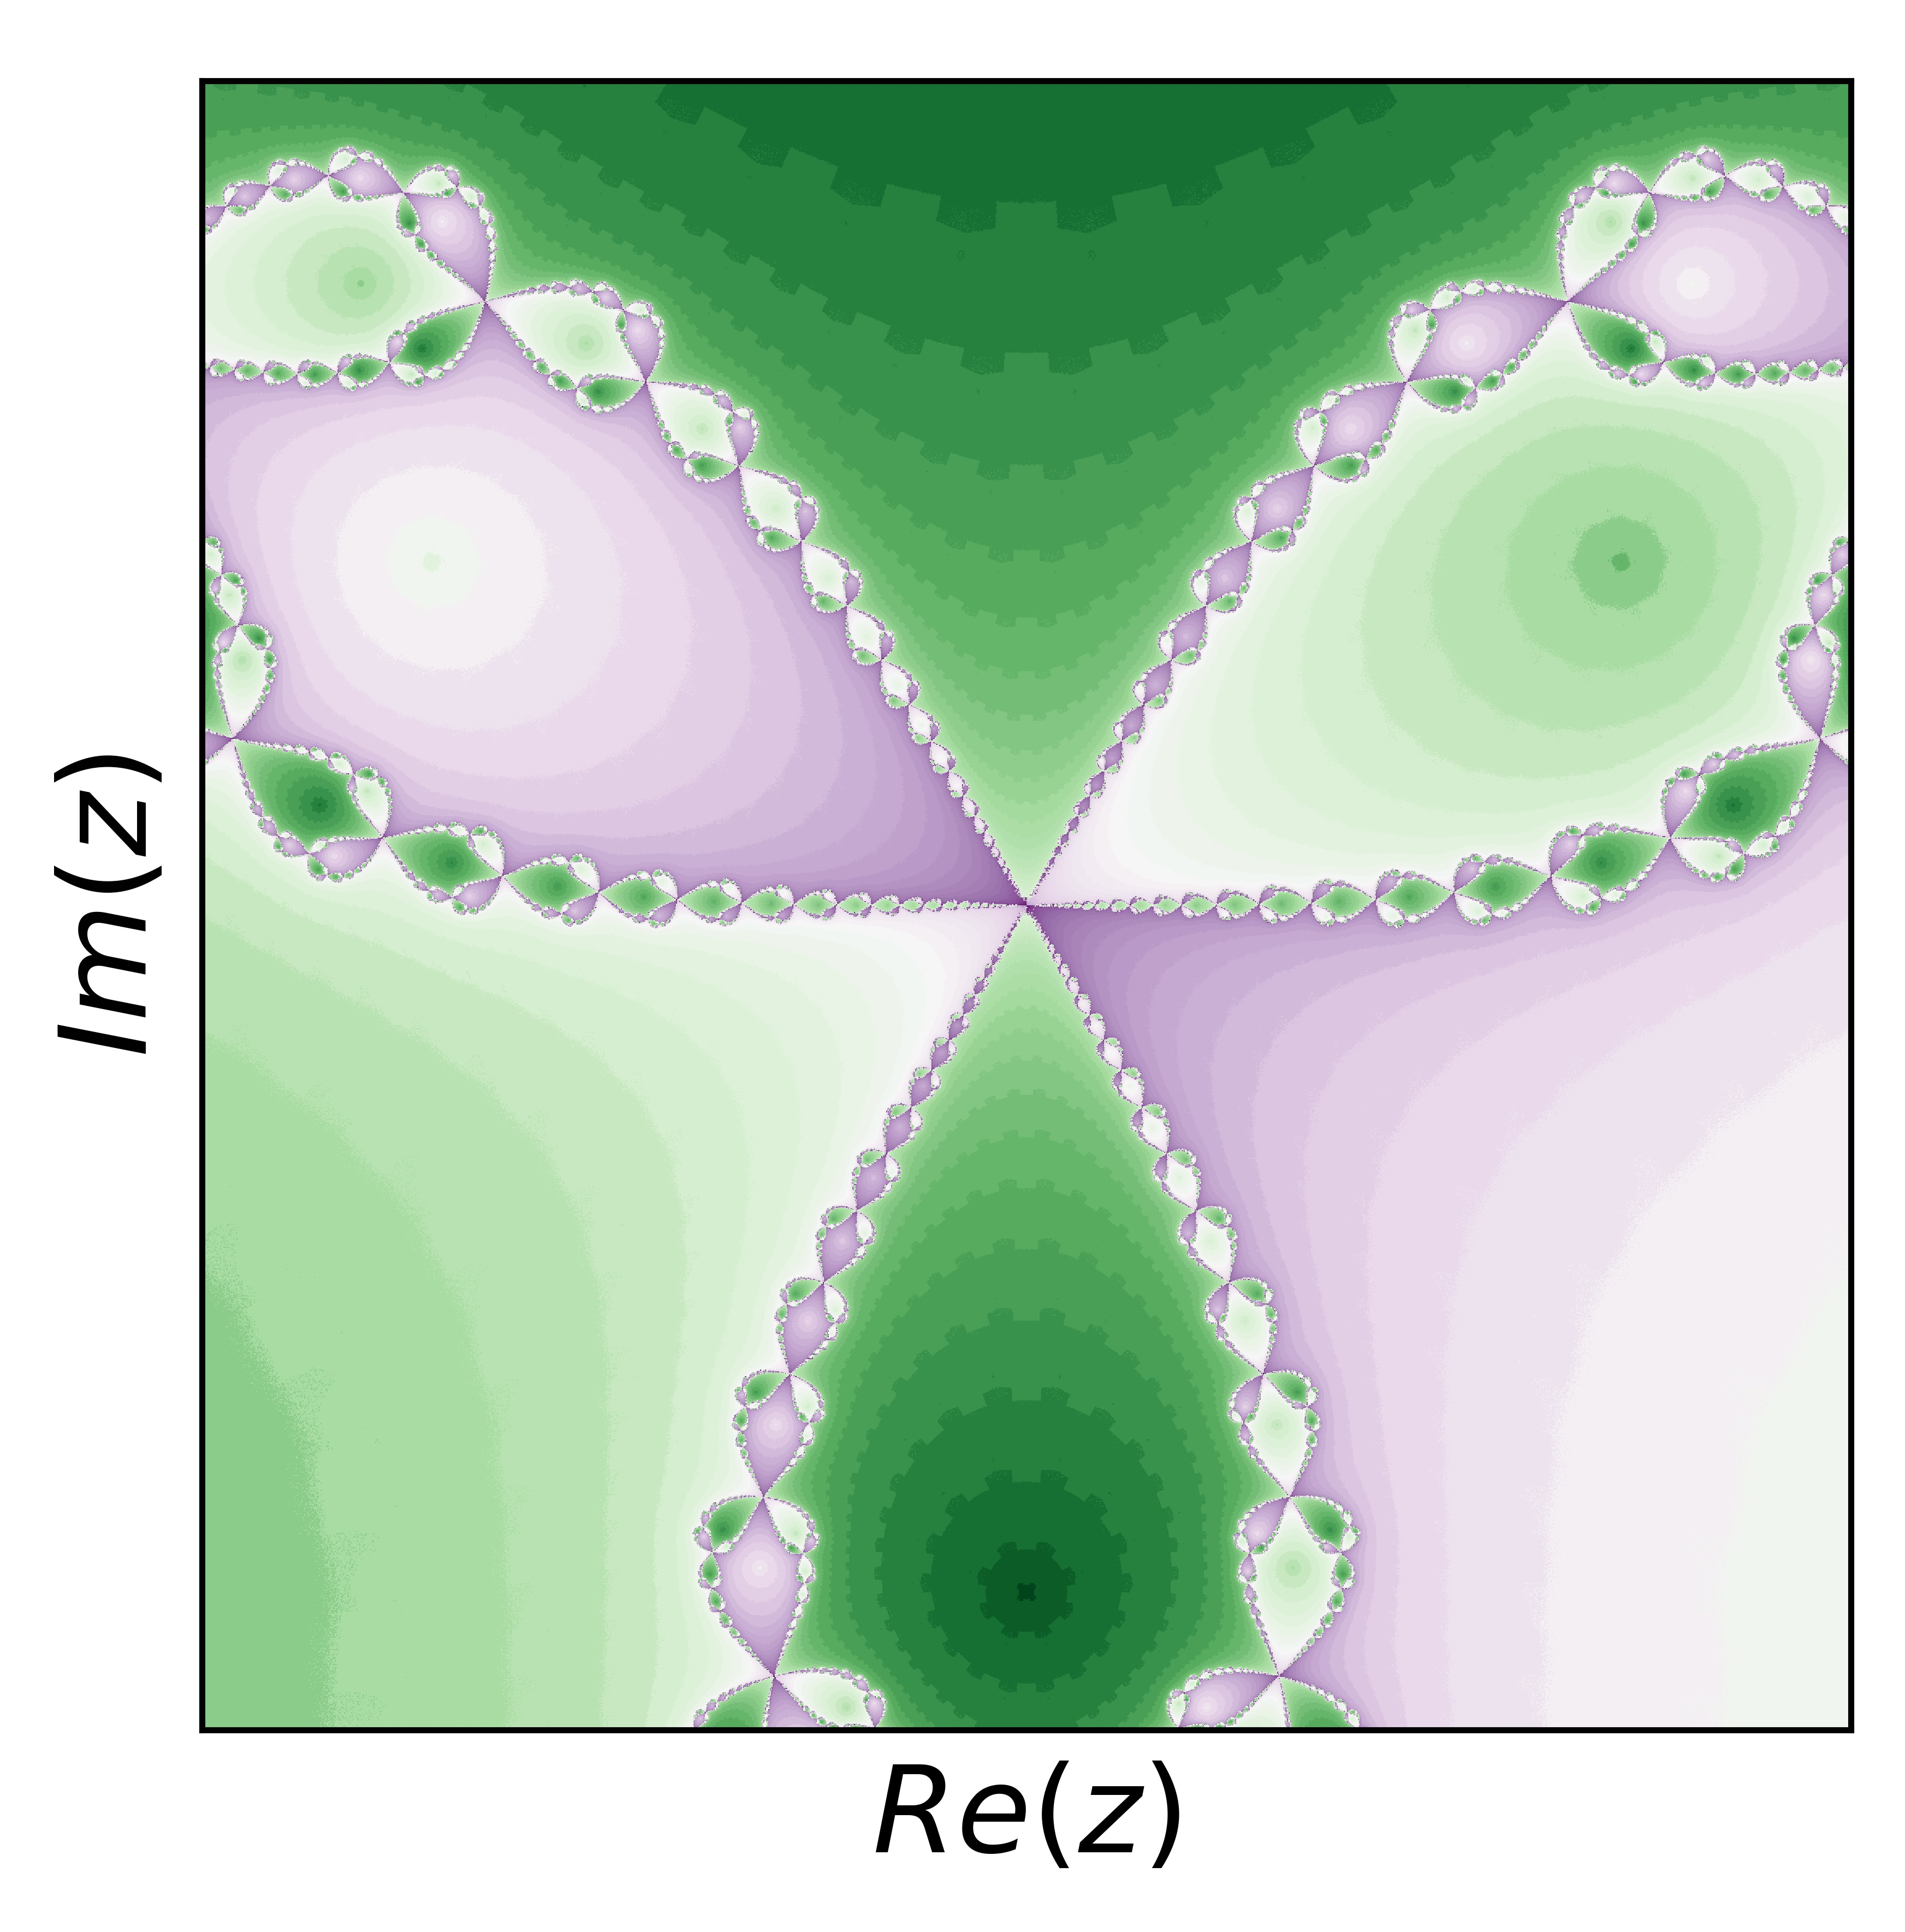

### Some hyperparameters

In [2]:
# for overview plots:
interval_left = -2.1
interval_right = 2.1
interval_down = -2.1
interval_up = 2.1

num_x = 1000
num_y = 1000
nmax = 1000
prec_goal = 1.e-10
h = 1e-12

### helper functions 

In [3]:
def diff_f(f,z,h):
    return f(z), (f(z+h)-f(z))/h 


def find_convergence(func, num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up):
    x, y = np.linspace(interval_left, interval_right, num_x), np.linspace(interval_down, interval_up, num_y)
    x = x.reshape(1, -1)
    y = y.reshape(-1, 1)
    
    z = np.array(x+y*1j).flatten()
    reldiff = np.ones(len(z))
    counter = np.zeros(len(z)).astype(int)
    prec_goal_list = np.ones(len(z)) * prec_goal
    
    # initialize overall counter for controlling the while loop
    overallcounter = 0
    
    while np.any(reldiff) > prec_goal and overallcounter < nmax:
      
        f, df= diff_f(func,z,h)
        diff = f/df
        reldiff = np.abs(diff/z)
        z=z-diff

        # increase the vectorized counter at each point, or not (if converged)
        counter = counter + np.greater(reldiff, prec_goal_list )
        # increase the control counter
        overallcounter += 1
    
    return z, counter

In [4]:
def id_root(root_list, z, counter, prec_goal = 1e-10):
    '''
        get the converged roots matched up with those predefined in the root list
    '''
    
    findgoal = prec_goal * np.ones(len(z))
    rootid = -1 * np.ones(len(z))
    for r in root_list:
        rootid = np.where(np.abs(z-r*np.ones(len(z))) < findgoal, np.ones(len(z)) * root_list.index(r), rootid)
    
    return rootid.astype(int), rootid-0.99*np.log(counter/np.max(counter))     


In [5]:
def plot_fractal(nroot, savefile = 'newton-fractal.jpg', dpi = 5000):
    
    nroot_contour = np.transpose(np.reshape(nroot,(num_x,num_y)))

    # create an imshow plot 
    plt.figure()
    plt.xlabel("$Re(z)$", fontsize=16)
    plt.ylabel("$Im(z)$", fontsize=16)

    plt.matshow(nroot_contour, fignum=0, interpolation='none', origin='lower', cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(savefile, bbox_inches='tight', dpi=dpi)
    plt.close()

# START HERE

### $$f(z) = z^3-1$$

In [6]:
def f0(z):
    return (z**3-1)

root_list0 = [np.exp(2*np.pi*1j/3), np.exp(4*np.pi*1j/3), 1] 

In [ ]:
z, counter = find_convergence(f0,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list0, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_0.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_0.jpg")

### $$f(z) = (z^2-1)(z^2+1)$$

In [ ]:
def f1(z):
    return (z**2-1)*(z**2+1)

root_list1 = [-1, 1, -1j, 1j]

In [ ]:
%%time 

z, counter = find_convergence(f1,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list1, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_1.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_1.jpg")

### $$f(z) = (z-2)(z-0.5)(z+1.5)(z+2)$$

In [ ]:
def f2(z):
    return (z-2)*(z-0.5)*(z+1.5)*(z+2)

root_list2 = [-2, -1.5, 0.5, 2]

In [ ]:
%%time

z, counter = find_convergence(func,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list2, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_2.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_2.jpg")

### $$f(z) = (z-2)(z-0.5)(z+1.5)^2(z+2)$$

In [ ]:
def f3(z):
    return (z-2)*(z-0.5)*(z+1.5)**2*(z+2)

root_list3 = [-2, -1.5, -1.5, 0.5, 2]

In [ ]:
%%time

z, counter = find_convergence(f3,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list3, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_3.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_3.jpg")

### $$f(z) = sin(z)$$

In [ ]:
def f4(z):
    return np.sin(z)

root_list4 = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi,]

In [ ]:
%%time

z, counter = find_convergence(f4,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list4, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_4.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_4.jpg")

### $$f(z) =  z^{12} -1$$

In [ ]:
def f5(z):
    return z**12-1

root_list5 = [-1,1,-1j,1j, 
              (1+1j*np.sqrt(3))/2, (1-1j*np.sqrt(3))/2, (-1+1j*np.sqrt(3))/2, -(1+1j*np.sqrt(3))/2,
             (np.sqrt(3)+1j)/2, (np.sqrt(3)-1j)/2,(-np.sqrt(3)+1j)/2, -(np.sqrt(3)+1j)/2]

In [ ]:
%%time

z, counter = find_convergence(f5,num_x, num_y, nmax, prec_goal, h, interval_left, interval_right, interval_down, interval_up)
nroot, nroot_shaded = id_root(root_list5, z, counter, prec_goal)
plot_fractal(nroot, "newton_fractal_5.jpg")
plot_fractal(nroot_shaded, "newton_fractal_shaded_5.jpg")